In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_cleaned.csv', index_col=0)
df_us = pd.read_csv('data_sub_20.csv', index_col=0)

## Entrenamiento de modelos con el submuestreo

In [3]:
from sklearn.model_selection import train_test_split
X = df_us.drop('Class', axis=1)
y = df_us['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [4]:
from skopt import BayesSearchCV

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

def getPRCurve(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    print('Accuracy:\t', round(accuracy_score(y_test, y_pred), 4))
    print('Precision:\t', round(precision_score(y_test, y_pred, average='binary'), 4))
    print('Recall:\t\t', round(recall_score(y_test, y_pred, average='binary'), 4))
    print('F1:\t\t', round(f1_score(y_test, y_pred, average='binary'), 4))
    disp = plot_precision_recall_curve(classifier, X_test, y_test)
    disp.ax_.set_title('Curva Precision-Recall ')

###  Regresión logística

Accuracy:	 0.9913
Precision:	 0.9888
Recall:		 0.8381
F1:		 0.9072


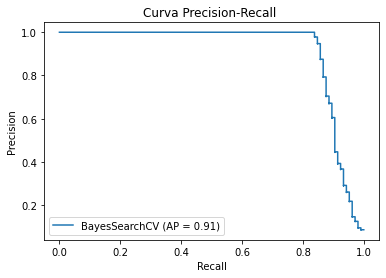

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': (1e-6, 1e+6, 'log-uniform')}
gridLR = BayesSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, scoring = 'average_precision')
gridLR.fit(X_train, y_train)
getPRCurve(gridLR, X_test, y_test)

###  Árboles de decisión

Accuracy:	 0.9918
Precision:	 0.9889
Recall:		 0.8476
F1:		 0.9128


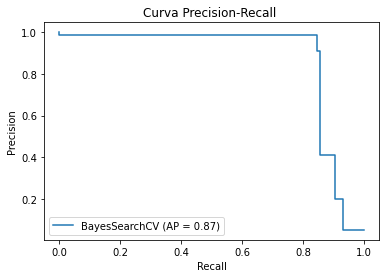

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_params = {"criterion": ["gini", "entropy"],
               "max_depth": (2,4), 
               "min_samples_leaf": (5,10)}

gridDTC = BayesSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'average_precision')
gridDTC.fit(X_train, y_train)
getPRCurve(gridDTC, X_test, y_test)

###  Bosques aleatorios

Accuracy:	 0.9923
Precision:	 1.0
Recall:		 0.8476
F1:		 0.9175


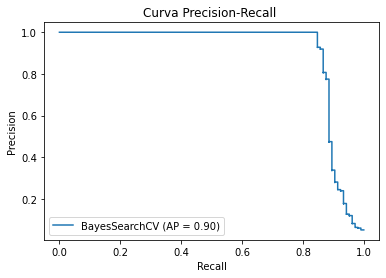

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest_params = {'n_estimators': (25,150), 
                    'max_depth': (2,5)} 

gridRFC = BayesSearchCV(RandomForestClassifier(), random_forest_params, scoring = 'average_precision')
gridRFC.fit(X_train,y_train)
getPRCurve(gridRFC, X_test, y_test)

###  Redes neuronales

Accuracy:	 0.9908
Precision:	 0.9674
Recall:		 0.8476
F1:		 0.9036


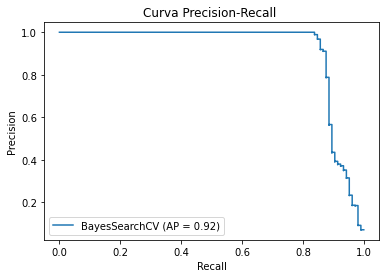

In [9]:
from sklearn.neural_network import MLPClassifier

mlp_params = {
    'hidden_layer_sizes': (30,100),
    'activation': ['tanh'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': (1e-6, 1e-1, 'log-uniform'),
}

gridMLP = BayesSearchCV(MLPClassifier(max_iter=500), mlp_params, n_jobs=-1, cv=3, scoring = 'average_precision')
gridMLP.fit(X_train, y_train)
getPRCurve(gridMLP, X_test, y_test)

## Probar con todos los datos

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
X.shape

(284807, 30)

###  Regresión logística

Accuracy:	 0.9987
Precision:	 0.5812
Recall:		 0.8435
F1:		 0.6882


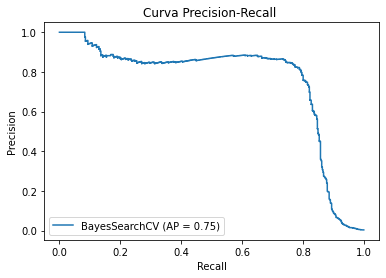

In [12]:
getPRCurve(gridLR, X, y)

###  Árboles de decisión

Accuracy:	 0.9981
Precision:	 0.4656
Recall:		 0.8537
F1:		 0.6026


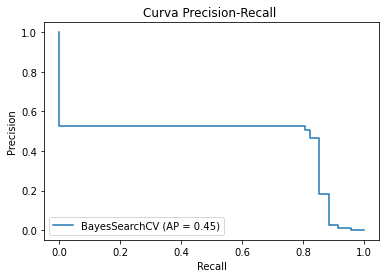

In [13]:
getPRCurve(gridDTC, X, y)

###  Bosques aleatorios

Accuracy:	 0.9993
Precision:	 0.7591
Recall:		 0.8455
F1:		 0.8


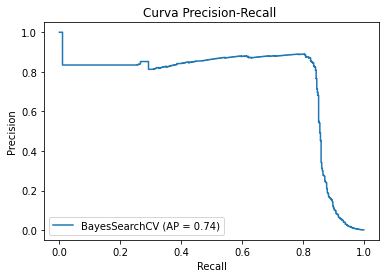

In [14]:
getPRCurve(gridRFC, X, y)

###  Redes neuronales

Accuracy:	 0.9984
Precision:	 0.5238
Recall:		 0.8963
F1:		 0.6612


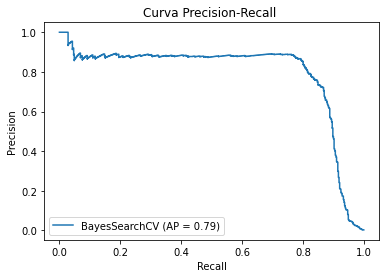

In [15]:
getPRCurve(gridMLP, X, y)

In [16]:
dLR = gridLR.best_params_
dDTC = gridDTC.best_params_
dRFC = gridRFC.best_params_
dMLP = gridMLP.best_params_

import json
print(json.dumps(dLR, indent=4))
print(json.dumps(dDTC, indent=4))
print(json.dumps(dRFC, indent=4))
print(json.dumps(dMLP, indent=4))

{
    "C": 0.1508471492948588,
    "penalty": "l2"
}
{
    "criterion": "entropy",
    "max_depth": 4,
    "min_samples_leaf": 8
}
{
    "max_depth": 5,
    "n_estimators": 150
}
{
    "activation": "tanh",
    "alpha": 0.1,
    "hidden_layer_sizes": 100,
    "solver": "adam"
}
